## Описание проекта:
Перейдём к задаче. HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

## Цель проекта:
У нас будет несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник. Наша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

## Ход исследования:
Задача 1: предсказание уровня удовлетворённости сотрудника Шаг 1. Загрузка и изучение данных
Шаг 2. Предобработка данных
Шаг 3. Исследовательский анализ данных
Шаг 4. Подготовка данных Шаг 5. Обучение моделей
Шаг 6. Оформление выводов
Задача 2: предсказание увольнения сотрудника из компании
Шаг 1. Загрузка данных
Шаг 2. Предобработка данных
Шаг 3. Исследовательский анализ данных Шаг 4. Добавление нового входного признака
Шаг 5. Подготовка данных
Шаг 6. Обучение модели
Шаг 7. Выводы
Общий вывод

In [1]:
! pip install -Uq scikit-learn

In [2]:
! pip install phik -q

## Задача 1: Предсказание уровня удовлетворённости сотрудника

### Шаг 1. Загрузка данных:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.metrics import roc_auc_score

In [4]:
train_job_satisfaction_rate = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv', sep=',')
train_job_satisfaction_rate.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [5]:
test_features = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv', sep=',')
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [6]:

test_target_job_satisfaction_rate = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv', sep=',')
test_target_job_satisfaction_rate.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Вывод: На этом шаге мы загрузили данные и убедились, что загрузка прошла успешно

### Шаг 2.Предобработка данных:

#### Проверим правильность типов данных и соблюдения змеиного стиля для каждого столбца

In [7]:
train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [8]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [9]:
test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


Ошибок типов и стиле названий в данных нет

#### Обработка пропусков

In [10]:
def check_missing_values(df):
    for column in df.columns:
        missing_values_count = df[column].isnull().sum()
        print(f"Столбец '{column}': {missing_values_count} пропусков")

In [11]:
check_missing_values(train_job_satisfaction_rate)

Столбец 'id': 0 пропусков
Столбец 'dept': 6 пропусков
Столбец 'level': 4 пропусков
Столбец 'workload': 0 пропусков
Столбец 'employment_years': 0 пропусков
Столбец 'last_year_promo': 0 пропусков
Столбец 'last_year_violations': 0 пропусков
Столбец 'supervisor_evaluation': 0 пропусков
Столбец 'salary': 0 пропусков
Столбец 'job_satisfaction_rate': 0 пропусков


In [12]:
check_missing_values(test_features)

Столбец 'id': 0 пропусков
Столбец 'dept': 2 пропусков
Столбец 'level': 1 пропусков
Столбец 'workload': 0 пропусков
Столбец 'employment_years': 0 пропусков
Столбец 'last_year_promo': 0 пропусков
Столбец 'last_year_violations': 0 пропусков
Столбец 'supervisor_evaluation': 0 пропусков
Столбец 'salary': 0 пропусков


In [13]:
check_missing_values(test_target_job_satisfaction_rate)

Столбец 'id': 0 пропусков
Столбец 'job_satisfaction_rate': 0 пропусков


Видим, что в первых двух датафреймах есть пропуски

In [14]:
rows_with_missing_values_1 = train_job_satisfaction_rate[train_job_satisfaction_rate.isnull().any(axis=1)]
display(rows_with_missing_values_1)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


In [15]:
rows_with_missing_values_2 =test_features[test_features.isnull().any(axis=1)]
print(rows_with_missing_values_2)

          id   dept   level workload  employment_years last_year_promo  \
191   609865    NaN  junior   medium                 1              no   
312   471990  sales     NaN      low                 1              no   
1196  832342    NaN  junior   medium                 1              no   

     last_year_violations  supervisor_evaluation  salary  
191                    no                      1   20400  
312                    no                      3   12000  
1196                   no                      4   28800  


Нашли пропуски в датафреймах, заполним эти пропуски на этапе создания пайплайна

#### Проврека явных и неявных дубликатов

In [16]:
train_job_satisfaction_rate.duplicated().any()

False

In [17]:
test_features.duplicated().any()

False

In [18]:
test_target_job_satisfaction_rate.duplicated().any()

False

Индексы не повторяются, значит в датафрейме нет явынх дубликатов. Проверка неявных дубликатов:

In [19]:
for column in train_job_satisfaction_rate.columns:
    if train_job_satisfaction_rate[column].dtype == 'object':
        print(f'Для столбца {column} уникальные значения: {train_job_satisfaction_rate[column].unique()}')

Для столбца dept уникальные значения: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Для столбца level уникальные значения: ['junior' 'middle' 'sinior' nan]
Для столбца workload уникальные значения: ['medium' 'high' 'low']
Для столбца last_year_promo уникальные значения: ['no' 'yes']
Для столбца last_year_violations уникальные значения: ['no' 'yes']


In [20]:
for column in test_features.columns:
    if test_features[column].dtype == 'object':
        print(f'Для столбца {column} уникальные значения: {test_features[column].unique()}')

Для столбца dept уникальные значения: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Для столбца level уникальные значения: ['junior' 'middle' 'sinior' nan]
Для столбца workload уникальные значения: ['medium' 'low' 'high' ' ']
Для столбца last_year_promo уникальные значения: ['no' 'yes']
Для столбца last_year_violations уникальные значения: ['no' 'yes']


Видим, что есть строки в столбцах 'dept' и 'worload' есть строки со значением ' '(пробел), выведем их

In [21]:
filtered_rows = test_features[(test_features['dept'] == ' ') | (test_features['workload'] == ' ')]
print(filtered_rows)

          id       dept   level workload  employment_years last_year_promo  \
15    590867  marketing  junior                          4              no   
1699  822186             middle   medium                 3              no   

     last_year_violations  supervisor_evaluation  salary  
15                     no                      4   28800  
1699                   no                      4   38400  


Заполнять пропуски будем уже на 4 шаге, где будем строить пайплайн

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Да, тоже верно!
</div>

Вывод: На этом шаге мы нашли пропуски и неявные дубликаты в данных, также осуществили проверку явных дубликатов и типов данных

### Шаг 3 Исследовательский анализ данных

In [22]:
def visualize_dataframe(dataframe):
    for column in dataframe.columns:
        column_type = dataframe[column].dtype

        if column_type == 'object':
            value_counts = dataframe[column].value_counts()
            value_counts.plot.pie(autopct='%1.1f%%', startangle=90)
            plt.title(f'{column} - Круговая диаграмма')
            plt.show()

        elif column_type in ['int64', 'float64'] and column != 'id':
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
            if column in ['supervisor_evaluation', 'employment_years']:
                sns.countplot(x=column, ax=axes[0], data=dataframe)
                axes[0].set_title(f'{column} - Столбчатая диаграмма')
                axes[0].set_xlabel(column)
                axes[0].set_ylabel('Частота')
            else:
                dataframe[column].plot.hist(bins=25, ax=axes[0])
                axes[0].set_title(f'{column} - Гистограмма')
                axes[0].set_xlabel(column)
                axes[0].set_ylabel('Частота')
            sns.boxplot(x=dataframe[column], ax=axes[1])
            axes[1].set_title(f'{column} - Boxplot')
            axes[1].set_xlabel(column)

            plt.show()
            
            print(dataframe[column].describe())

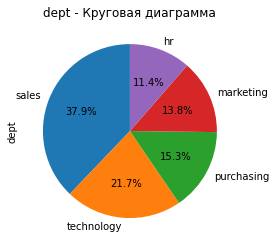

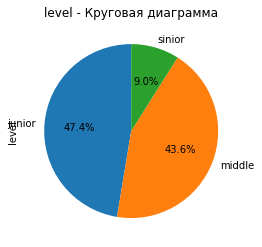

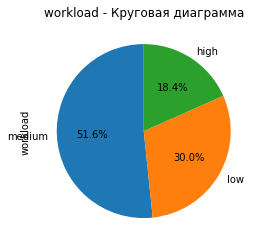

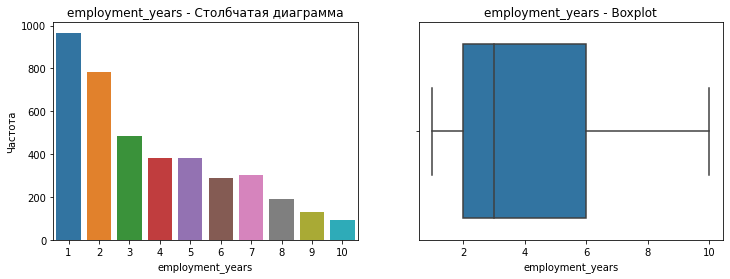

count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


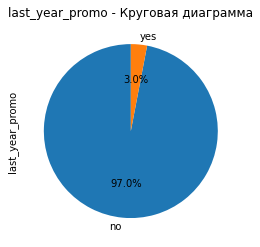

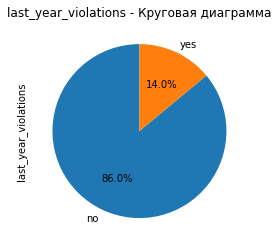

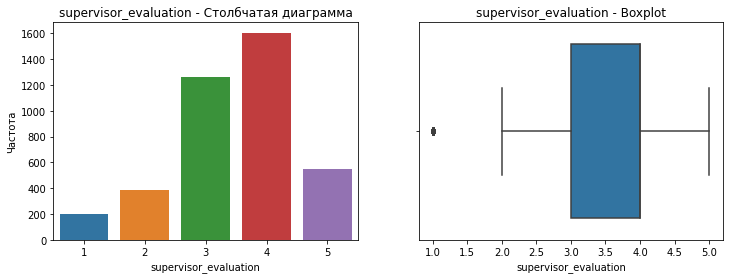

count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


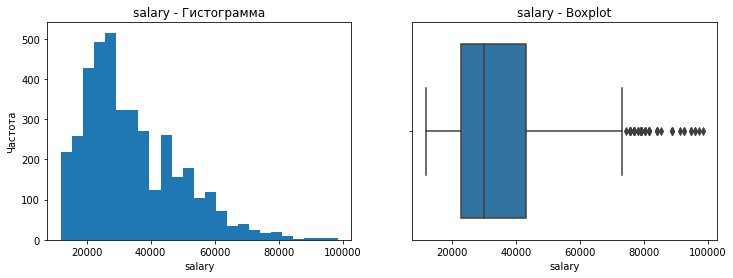

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64


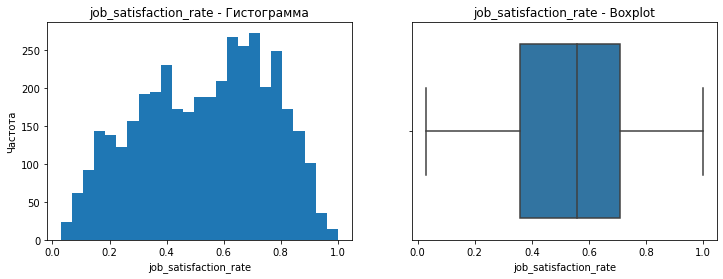

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


In [23]:
visualize_dataframe(train_job_satisfaction_rate)

In [ ]:
visualize_dataframe(test_features)

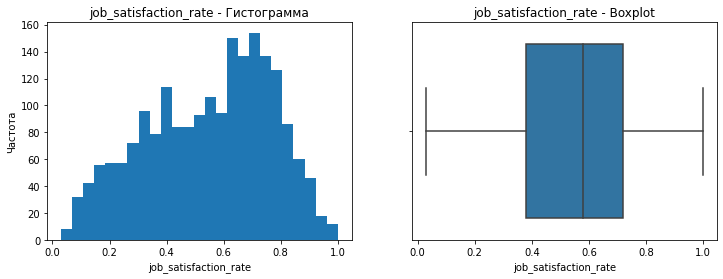

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64


In [25]:
visualize_dataframe(test_target_job_satisfaction_rate)

Очевидных выбросов я не обнаружил

На этом шаге мы провели исследовательский анализ данных, где построили гистограммы и ящик с усами для числовых признаков. Для категориальный пострили круговую диаграмму. Выбросов в данных не было найдено

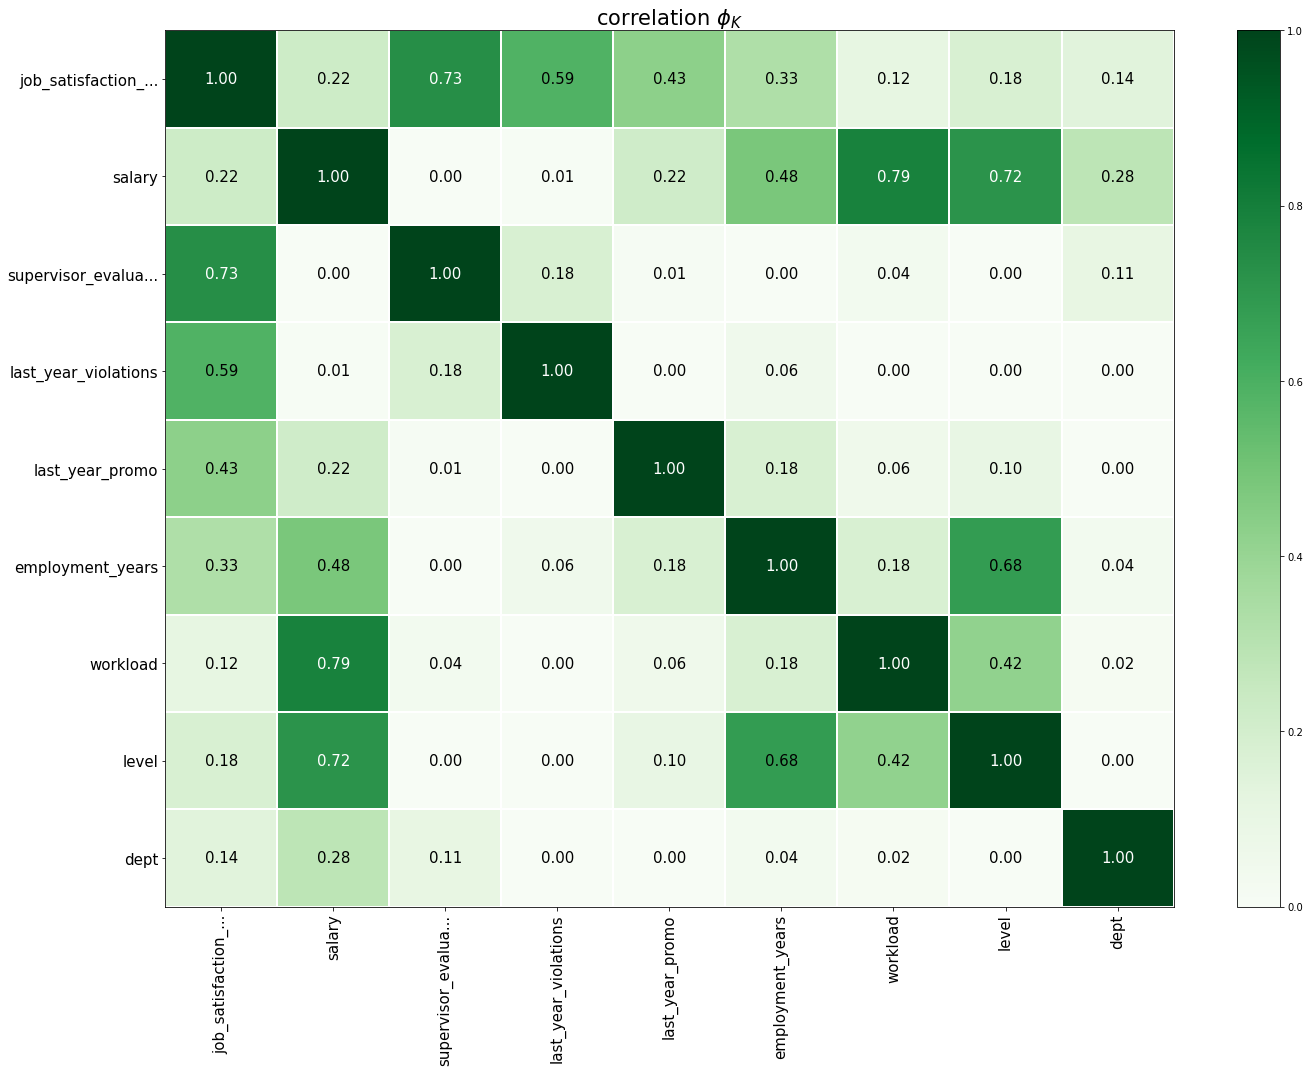

In [26]:
interval_cols = ['employment_years', 'salary', 'supervisor_evaluation', 'job_satifaction_rate']
phik_overview = phik_matrix(train_job_satisfaction_rate.iloc[:, 1:], interval_cols=interval_cols) 

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

На корреляционной матрице видим, что есть показатели с высокой корреляцией между ними, к примеру параметр salary сильно коррелирует с level и workload, а целевой признак коррелирует с с supervsior_evaluation. Потсроим для этих трех пар параметров ящики с усами, ведь в каждой из указанных пар есть ровно 1 категориальный и 1 числовой признак

<Figure size 720x360 with 0 Axes>

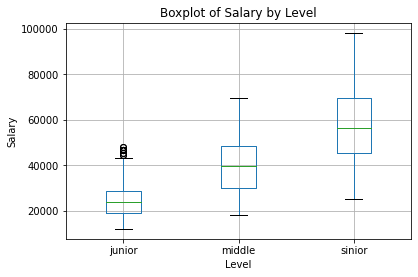

<Figure size 720x360 with 0 Axes>

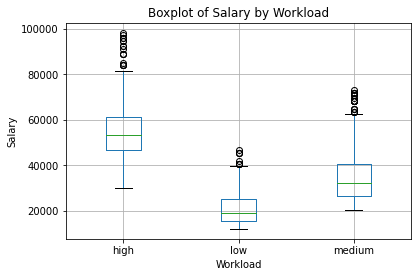

<Figure size 720x360 with 0 Axes>

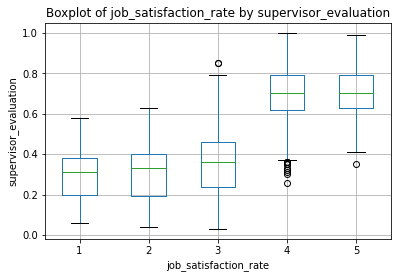

In [27]:
plt.figure(figsize=(10, 5))
train_job_satisfaction_rate.boxplot(column='salary', by='level')
plt.title('Boxplot of Salary by Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.suptitle('')
plt.show()

plt.figure(figsize=(10, 5))
train_job_satisfaction_rate.boxplot(column='salary', by='workload')
plt.title('Boxplot of Salary by Workload')
plt.xlabel('Workload')
plt.ylabel('Salary')
plt.suptitle('')
plt.show()

plt.figure(figsize=(10, 5))
train_job_satisfaction_rate.boxplot(column='job_satisfaction_rate', by='supervisor_evaluation')
plt.title('Boxplot of job_satisfaction_rate by supervisor_evaluation')
plt.xlabel('job_satisfaction_rate')
plt.ylabel('supervisor_evaluation')
plt.suptitle('')
plt.show()

Видим четкую взаимосвязь между salary и параметрами level и workload, но удалять я не стал, проверял, с salary метрика SMAPE получается меньше в шаге 5

Вывод: На этом шаге мы провели исследовательский анализ и корреляционный анализ

### Шаг 4. Подготовка данных

In [28]:
train_job_satisfaction_rate.set_index('id', inplace=True)
test_features.set_index('id', inplace=True)
test_target_job_satisfaction_rate.set_index('id', inplace=True)

df_test = test_features.join(test_target_job_satisfaction_rate)
df_test.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


In [29]:
duplicates_train_job_satisfaction_rate = train_job_satisfaction_rate[train_job_satisfaction_rate.duplicated()]
duplicates_train_job_satisfaction_rate.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
302957,purchasing,junior,low,1,no,no,4,15600,0.61
752399,sales,middle,low,7,no,no,4,28800,0.77
802286,sales,junior,medium,1,no,no,4,21600,0.43
167303,sales,junior,medium,1,no,no,3,24000,0.34
191841,sales,junior,medium,1,no,no,5,21600,0.44


In [30]:
train_job_satisfaction_rate.drop_duplicates(inplace=True)
train_job_satisfaction_rate.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


In [31]:
X_train = train_job_satisfaction_rate.drop('job_satisfaction_rate', axis = 1)
y_train = train_job_satisfaction_rate['job_satisfaction_rate']
X_test = df_test.drop('job_satisfaction_rate', axis = 1)
y_test = df_test['job_satisfaction_rate']
X_test.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


Построим пайплайн для предобработки данных, а также для их кодированиия

In [32]:
ord_columns = ['workload', 'supervisor_evaluation']
ohe_columns = ['dept', 'level', 'last_year_promo', 'last_year_violations']
num_columns = ['employment_years', 'salary']

ohe_pipe_train = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=' ')),  # Заменяем пробелы на константу
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

ord_pipe_train = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=' ')),  # Заменяем пробелы на константу
    ('ord', OrdinalEncoder(categories=[
        ['high', 'medium', 'low'],
        [5, 4, 3, 2, 1]
    ], handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('imputer_after_ord', SimpleImputer(strategy='most_frequent'))
])

num_pipe_train = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Заменяем пропуски медианным значением
    ('scaler', StandardScaler())
])

train_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe_train, ohe_columns),
    ('ord', ord_pipe_train, ord_columns),
    ('num', num_pipe_train, num_columns)
],  remainder='passthrough')

In [33]:
train_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=' ',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['dept', 'level', 'last_year_promo',
                                  'last_year_violations']),
                                ('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=' ',
                                                                strateg...
                                                  OrdinalEncoder(categories=[['high',
                                                                              'medium',
                                                                              'low'],
                                                                             [5,
                                                                              4,
                                                                              3,
                                                                              2,
                                                                              1]],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan)),
                                                 ('imputer_after_ord',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['workload', 'supervisor_evaluation']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['employment_years', 'salary'])])

На этом шаге мы выполнили подготовку признаков в пайплайне. При кодировании учитывали особенности признаков и модели, а также использовали два кодировщика

### Шаг 5.Обучение моделей

In [34]:
RANDOM_STATE = 42
pipe_final = Pipeline([
    ('preprocessor', train_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])
def smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = (np.abs(y_true - y_pred)) / denominator  
    return 100 * np.mean(diff)

param_grid = [
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(13, 15),
        'models__max_features': range(10, 12),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

# Создаем пайплайн
pipe_final = Pipeline([
    ('preprocessor', train_preprocessor),
    ('models', LinearRegression())
])

# Определяем метрику SMAPE
smape_scorer = make_scorer(smape, greater_is_better=False)

# Инициализируем поиск по сетке
grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape_scorer,  
    n_jobs=1,
    error_score='raise'
)

# Запускаем поиск по сетке
grid_search.fit(X_train, y_train)

print('Лучший результат SMAPE на тренировочной выборке для каждой модели:')
for i, params in enumerate(grid_search.cv_results_['params']):
    print(f"Модель {i+1}: {-grid_search.cv_results_['mean_test_score'][i]:.2f}, Параметры: {params}")


print('\nЛучшие результаты SMAPE и параметры для всех моделей:')
best_index = np.argmax(grid_search.cv_results_['mean_test_score'])
best_score = -grid_search.cv_results_['mean_test_score'][best_index]
best_params = grid_search.cv_results_['params'][best_index]
print(f"Лучший результат SMAPE: {best_score:.2f}")
print(f"Лучшие параметры: {best_params}")

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
smape_test = smape(y_test, y_test_pred)
print('\nМетрика SMAPE на тестовой выборке для лучшей модели:', smape_test)

Лучший результат SMAPE на тренировочной выборке для каждой модели:
Модель 1: 24.99, Параметры: {'models': LinearRegression(), 'preprocessor__num': StandardScaler()}
Модель 2: 24.99, Параметры: {'models': LinearRegression(), 'preprocessor__num': MinMaxScaler()}
Модель 3: 24.99, Параметры: {'models': LinearRegression(), 'preprocessor__num': 'passthrough'}
Модель 4: 15.99, Параметры: {'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'models__max_features': 10, 'preprocessor__num': StandardScaler()}
Модель 5: 15.95, Параметры: {'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'models__max_features': 10, 'preprocessor__num': MinMaxScaler()}
Модель 6: 15.98, Параметры: {'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'models__max_features': 10, 'preprocessor__num': 'passthrough'}
Модель 7: 15.35, Параметры: {'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'models__max_features': 11, 'pre

In [35]:
y_test_pred_final = pd.DataFrame(y_test_pred, index=X_test.index, columns=['job_satisfaction_rate'])
y_test_pred_final.head()

,job_satisfaction_rate
id,
485046,0.837297
686555,0.669429
467458,0.643333
418655,0.666000
789145,0.777000


Получилось пройти порог значением в 15, лучшей моделью оказалась 'models': DecisionTreeRegressor(max_depth=13, max_features=11, random_state=42), 'models__max_depth': 13, 'models__max_features': 11, 'preprocessor__num': MinMaxScaler(). Она позала значение SMAPE = 14.53 на тестовой выборке

### Шаг 6. Оформление выводов

В этой задаче мы предсказывали уровень удовлетворенности сотрудника, для этого были сделание такие шаги как: предобработка, статистический и корреляционный анализ, после чего мы стали обучать модель. Лучшей по метрике SMAPE оказалась модель DecisionTreeRegressor, она стала успешной по кртиерию SMAPE <= 15 на тестовой выборке

## Задача 2: предсказание увольнения сотрудника из компании

### Шаг 1. Загрузка данных

In [36]:
train_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv', sep=',')
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [37]:
test_features = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv', sep=',')
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [38]:
test_target_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv', sep=',')
test_target_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


Вывод: На этом шаге мы загрузили данные и убедились в отсутствии ошибок при загрузке

### Шаг 2.Предобработка данных

#### Проеврка типов значений в каждом столбце

In [39]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [40]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [41]:
test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


В каждой таюлице все значения находтся в нужном типе

#### Обработка пропусков

In [42]:
def check_missing_values(df):
    for column in df.columns:
        missing_values_count = df[column].isnull().sum()
        print(f"Столбец '{column}': {missing_values_count} пропусков")

In [43]:
check_missing_values(train_quit)

Столбец 'id': 0 пропусков
Столбец 'dept': 0 пропусков
Столбец 'level': 0 пропусков
Столбец 'workload': 0 пропусков
Столбец 'employment_years': 0 пропусков
Столбец 'last_year_promo': 0 пропусков
Столбец 'last_year_violations': 0 пропусков
Столбец 'supervisor_evaluation': 0 пропусков
Столбец 'salary': 0 пропусков
Столбец 'quit': 0 пропусков


In [44]:
check_missing_values(test_features)

Столбец 'id': 0 пропусков
Столбец 'dept': 2 пропусков
Столбец 'level': 1 пропусков
Столбец 'workload': 0 пропусков
Столбец 'employment_years': 0 пропусков
Столбец 'last_year_promo': 0 пропусков
Столбец 'last_year_violations': 0 пропусков
Столбец 'supervisor_evaluation': 0 пропусков
Столбец 'salary': 0 пропусков


In [45]:
check_missing_values(test_target_quit)

Столбец 'id': 0 пропусков
Столбец 'quit': 0 пропусков


Аналогично соответсвенному шагу из предыдущей задачи, все пропуски будем заполнять в шаге с пайплайном

#### Проврека явных и неявных дубликатов

In [46]:
print(train_quit.duplicated().sum())
print(test_features.duplicated().sum())
print(test_target_quit.duplicated().sum())

0
0
0


Явных дубликатов нет, проведем проверку на неявные дубликаты

In [47]:
for column in train_quit.columns:
    if train_quit[column].dtype == 'object':
        print(f'Для столбца {column} уникальные значения: {train_quit[column].unique()}')

Для столбца dept уникальные значения: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
Для столбца level уникальные значения: ['middle' 'junior' 'sinior']
Для столбца workload уникальные значения: ['high' 'medium' 'low']
Для столбца last_year_promo уникальные значения: ['no' 'yes']
Для столбца last_year_violations уникальные значения: ['no' 'yes']
Для столбца quit уникальные значения: ['no' 'yes']


In [48]:
for column in test_features.columns:
    if test_features[column].dtype == 'object':
        print(f'Для столбца {column} уникальные значения: {test_features[column].unique()}')

Для столбца dept уникальные значения: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Для столбца level уникальные значения: ['junior' 'middle' 'sinior' nan]
Для столбца workload уникальные значения: ['medium' 'low' 'high' ' ']
Для столбца last_year_promo уникальные значения: ['no' 'yes']
Для столбца last_year_violations уникальные значения: ['no' 'yes']


In [49]:
for column in test_target_quit.columns:
    if test_target_quit[column].dtype == 'object':
        print(f'Для столбца {column} уникальные значения: {test_target_quit[column].unique()}')

Для столбца quit уникальные значения: ['yes' 'no']


### Шаг 3.Исследовательский анализ данных

#### Проведем исследовательский анализ данных

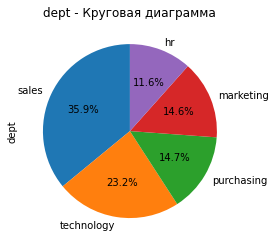

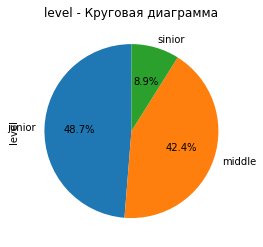

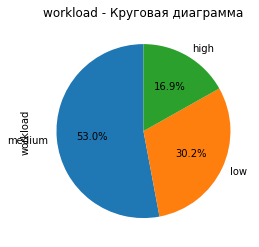

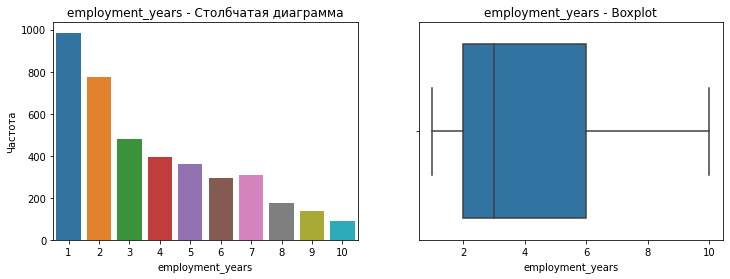

count    4000.000000
mean        3.701500
std         2.541852
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


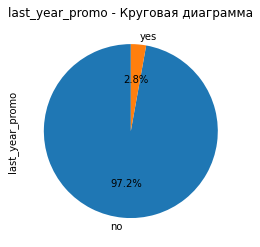

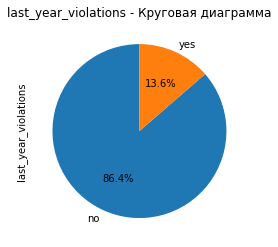

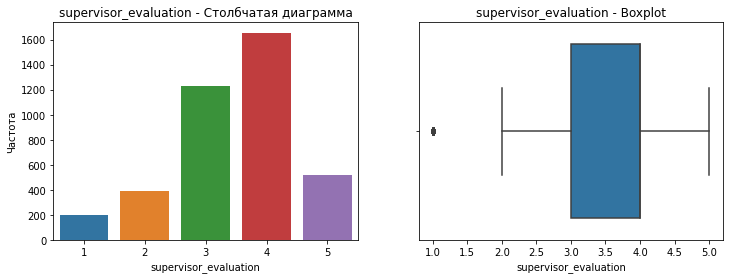

count    4000.000000
mean        3.474750
std         1.004049
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


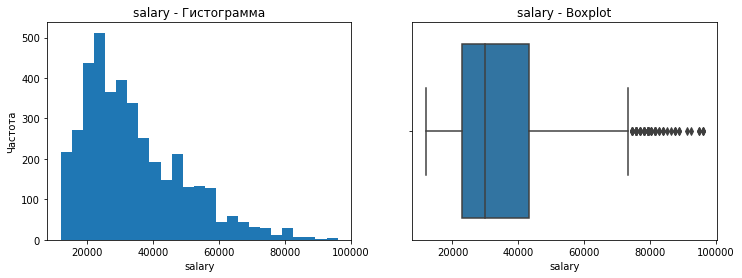

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


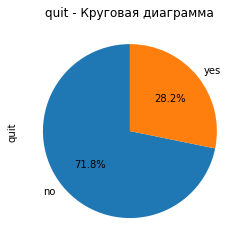

In [50]:
visualize_dataframe(train_quit)

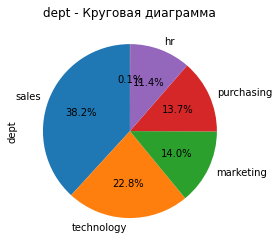

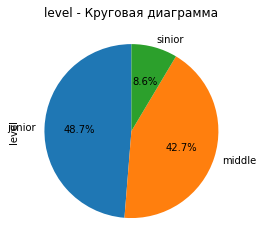

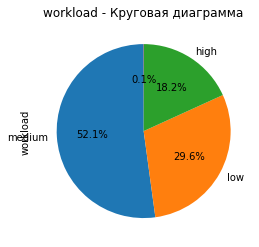

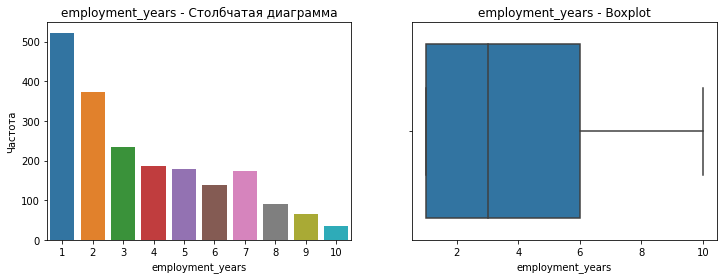

count    2000.000000
mean        3.666500
std         2.537222
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


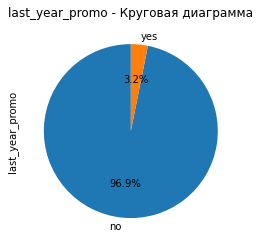

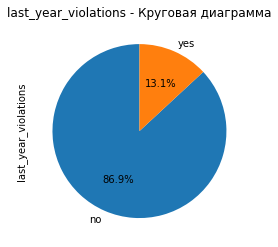

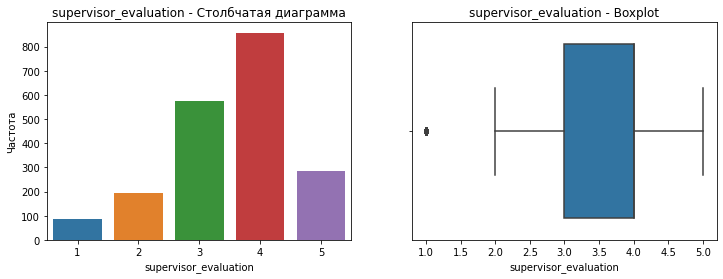

count    2000.000000
mean        3.526500
std         0.996892
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


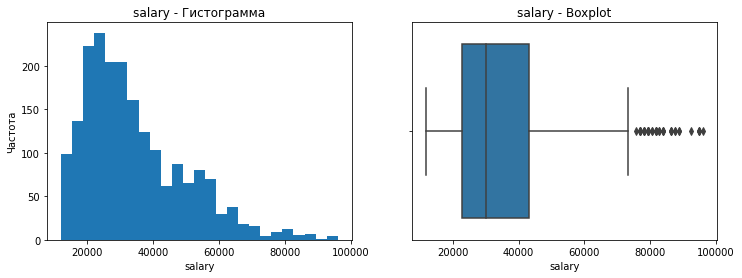

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


In [51]:
visualize_dataframe(test_features)

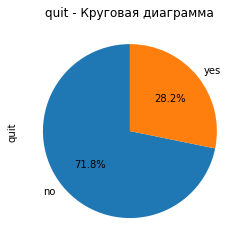

In [52]:
visualize_dataframe(test_target_quit)

Каких-либо аномалий или выбросов необнаружено

Построим корреляционную матрицу для тестовой выборки

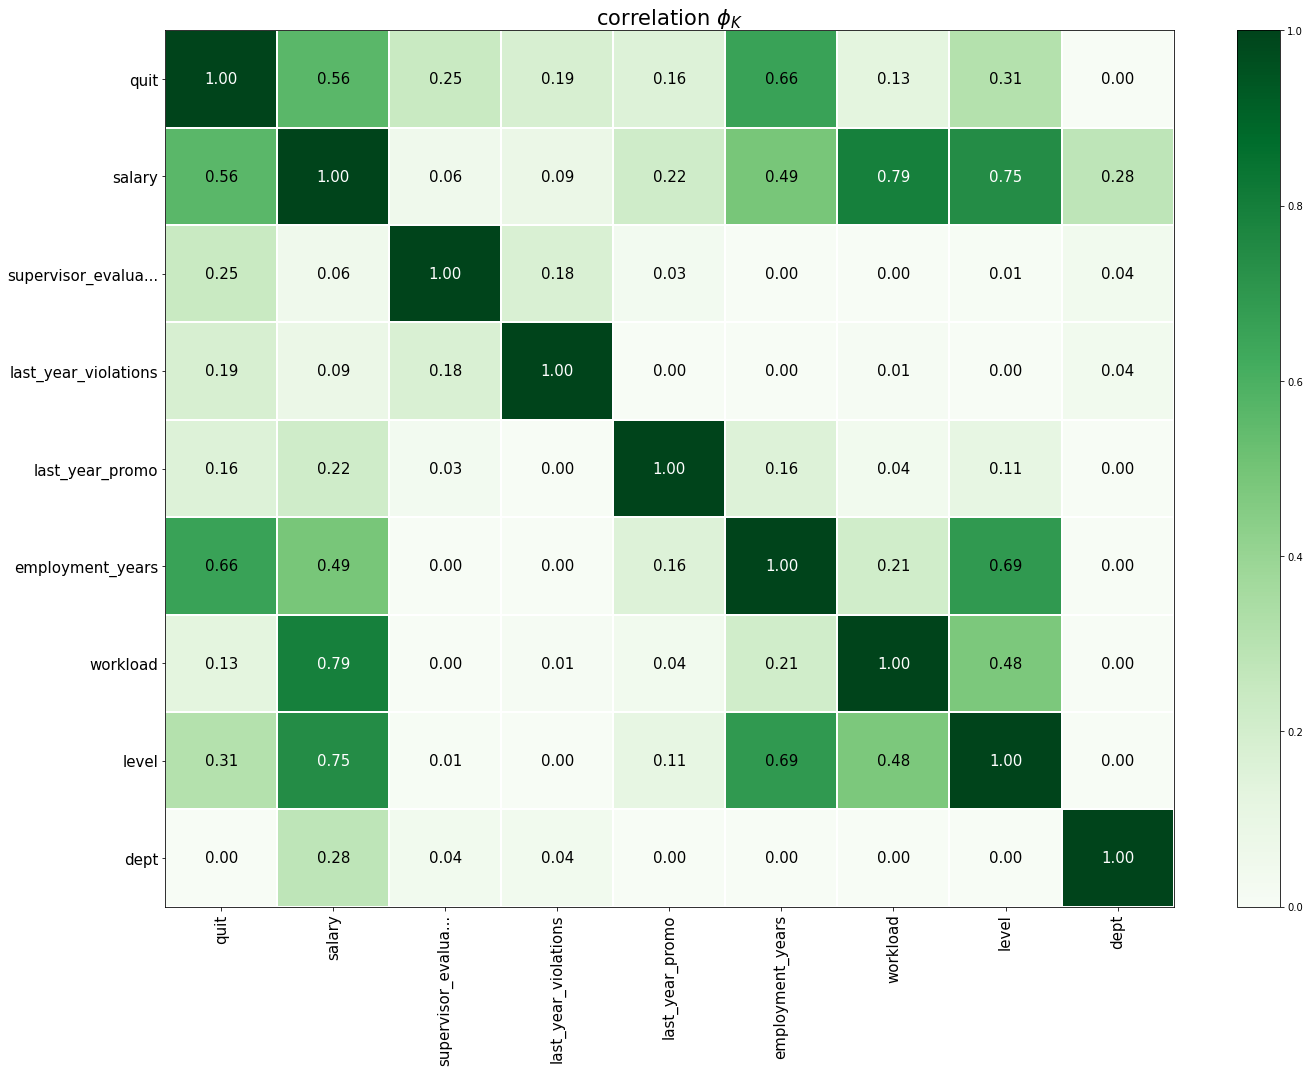

In [53]:
interval_cols = ['employment_years', 'salary', 'supervisor_evaluation', 'job_satifaction_rate', 'quite']
phik_overview = phik_matrix(train_quit.iloc[:, 1:], interval_cols=interval_cols) 

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

Как и в первой задаче, видим, что признак salary коррелирует с Level и workload, строить boxplot графики не будем, они будут схожими с графиками из первой задачи

#### Составим портрет 'уволившегося сотрудника'

Узнаем, в каком отделе с бльшей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности

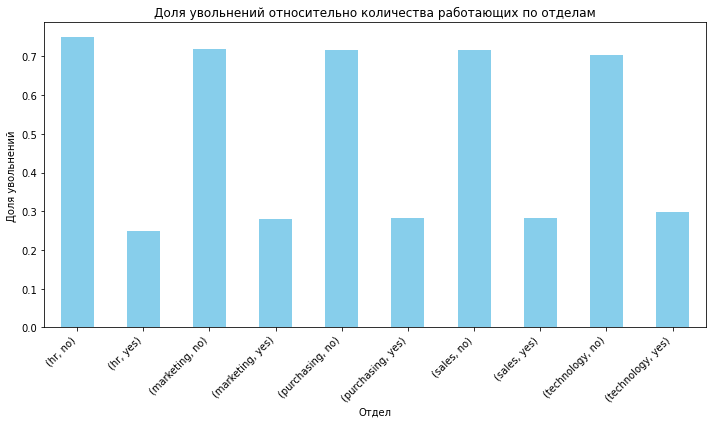

In [54]:
dept_quit_percentage = train_quit.groupby(['dept'])['quit'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
dept_quit_percentage.plot(kind='bar', color='skyblue')

plt.title('Доля увольнений относительно количества работающих по отделам')
plt.xlabel('Отдел')
plt.ylabel('Доля увольнений')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

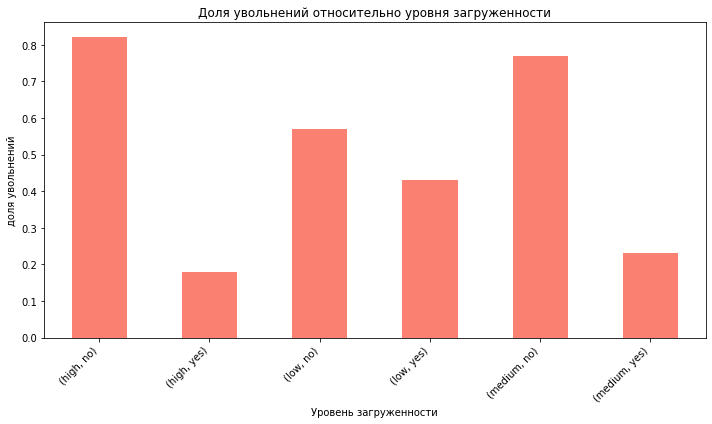

In [55]:
workload_counts = train_quit.groupby(['workload'])['quit'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
workload_counts.plot(kind='bar', color='salmon')

plt.title('Доля увольнений относительно уровня загруженности')
plt.xlabel('Уровень загруженности')
plt.ylabel('доля увольнений')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

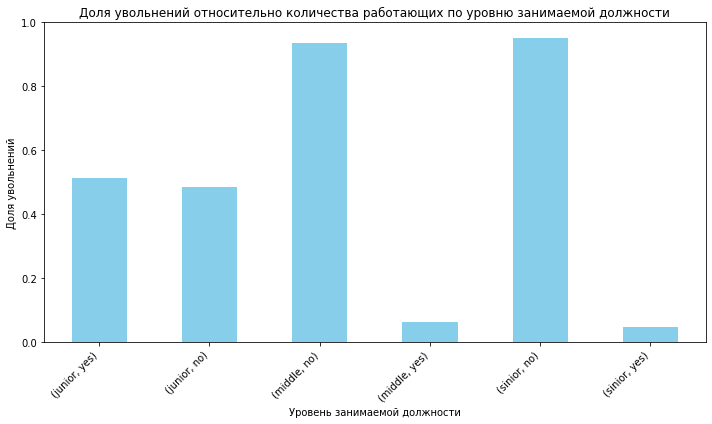

In [56]:
dept_quit_percentage = train_quit.groupby(['level'])['quit'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
dept_quit_percentage.plot(kind='bar', color='skyblue')

plt.title('Доля увольнений относительно количества работающих по уровню занимаемой должности')
plt.xlabel('Уровень занимаемой должности')
plt.ylabel('Доля увольнений')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

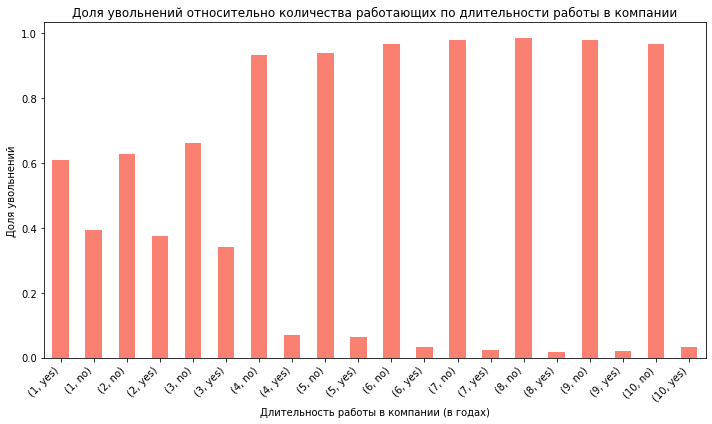

In [57]:
dept_quit_percentage = train_quit.groupby(['employment_years'])['quit'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
dept_quit_percentage.plot(kind='bar', color='salmon')

plt.title('Доля увольнений относительно количества работающих по длительности работы в компании')
plt.xlabel('Длительность работы в компании (в годах)')
plt.ylabel('Доля увольнений')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

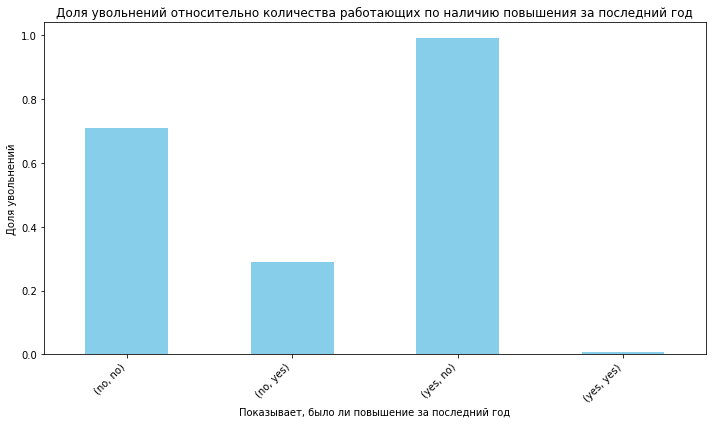

In [58]:
dept_quit_percentage = train_quit.groupby(['last_year_promo'])['quit'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
dept_quit_percentage.plot(kind='bar', color='skyblue')

plt.title('Доля увольнений относительно количества работающих по наличию повышения за последний год')
plt.xlabel('Показывает, было ли повышение за последний год')
plt.ylabel('Доля увольнений')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

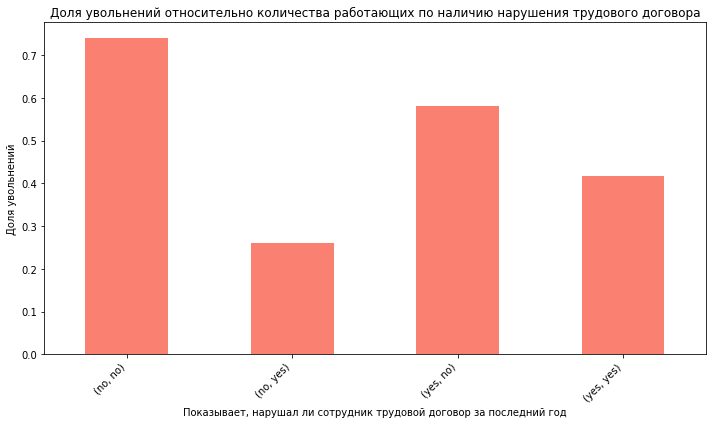

In [59]:
dept_quit_percentage = train_quit.groupby(['last_year_violations'])['quit'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
dept_quit_percentage.plot(kind='bar', color='salmon')

plt.title('Доля увольнений относительно количества работающих по наличию нарушения трудового договора')
plt.xlabel('Показывает, нарушал ли сотрудник трудовой договор за последний год')
plt.ylabel('Доля увольнений')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

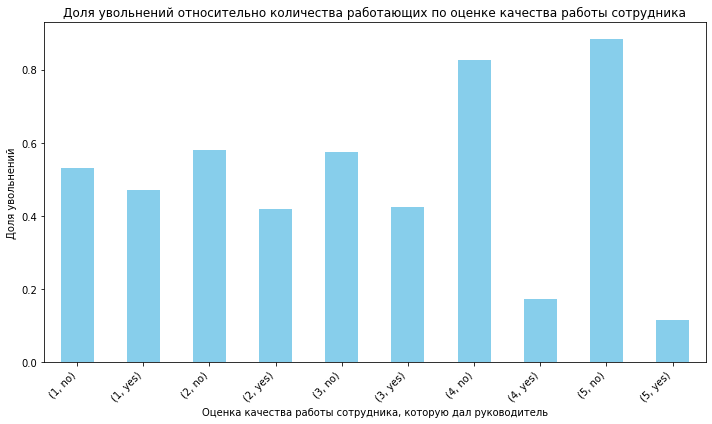

In [60]:
dept_quit_percentage = train_quit.groupby(['supervisor_evaluation'])['quit'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
dept_quit_percentage.plot(kind='bar', color='skyblue')

plt.title('Доля увольнений относительно количества работающих по оценке качества работы сотрудника')
plt.xlabel('Оценка качества работы сотрудника, которую дал руководитель')
plt.ylabel('Доля увольнений')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

Найдем среднее значение зарплат для уволившихся и оставшихся сотрудников

In [61]:
grouped_by_quit = train_quit.groupby('quit')

average_salary_by_quit = grouped_by_quit['salary'].mean()

print("Средняя зарплата у уволившихся сотрудников:", average_salary_by_quit['yes'])
print("Средняя зарплата у оставшихся сотрудников:", average_salary_by_quit['no'])

Средняя зарплата у уволившихся сотрудников: 23885.106382978724
Средняя зарплата у оставшихся сотрудников: 37702.22841225627


По построенным диаграммам и расчетам, мы можем сделать вывод, что отедл, где работает сотрудник почти не влияет на увольнения, в каждом из отделов примерно одинаковое количество увольнений (25%-30%), тогда как уровень загруженности влияет давольно сильно, примерно 45% сотрудников уровненм загружености low покаидают компанию, тогда как с уровненм загруженности medium только около 20%, а high еще меньше. Также влияют такие факторы как: Уровень занимаемой дожности(чаще всего увольняются junior), длительность работы в компании (чаще увольняются сотрудники, отработавшие от 1 до 3 лет), наличие повышения за последний год(среди тех кто получил повышение, почти нет увольнений), наличие нарушения трудового договора(у тех, кто не нарушал договор, увольнений меньше), оценке качества работы сотрудника(рабочие, получившие оценку от 3 до 5, увольняются реже). Также можем обратить внимание, что уволившиеся сотрудники в среднем имели на 14 тыс меньше средней зарплаты, чем оставшиеся сотрудники

#### Проверим утверждаение о том, что уровень удовлетворенности сотрудника работой в компании влияет на то, уволится ли сотрудник

In [62]:
test_features.set_index('id', inplace=True)
test_target_quit.set_index('id', inplace=True)
test_features = test_features.join(test_target_job_satisfaction_rate)
test_final = test_features.join(test_target_quit)
test_final.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
686555,hr,junior,medium,1,no,no,4,30000,0.72,no
467458,sales,middle,low,5,no,no,4,19200,0.64,no
418655,sales,middle,low,6,no,no,4,19200,0.60,no
789145,hr,middle,medium,5,no,no,5,40800,0.75,no


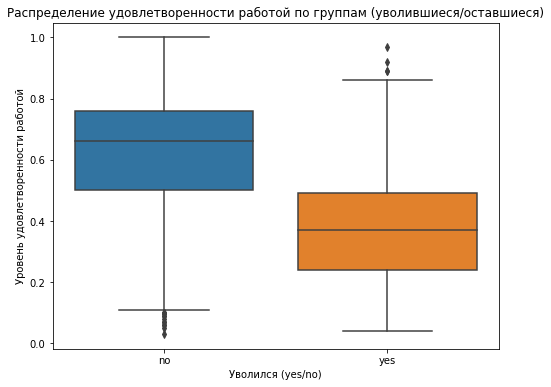

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='quit', y='job_satisfaction_rate', data=test_final)
plt.title('Распределение удовлетворенности работой по группам (уволившиеся/оставшиеся)')
plt.xlabel('Уволился (yes/no)')
plt.ylabel('Уровень удовлетворенности работой')
plt.show()

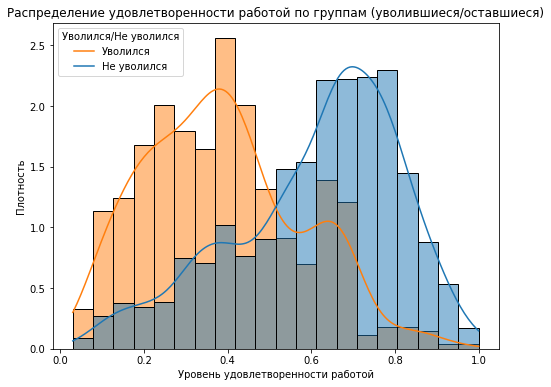

In [64]:
plt.figure(figsize=(8, 6))
sns.histplot(data=test_final, x='job_satisfaction_rate', hue='quit', kde=True, bins=20, stat='density', common_norm=False)
plt.title('Распределение удовлетворенности работой по группам (уволившиеся/оставшиеся)')
plt.xlabel('Уровень удовлетворенности работой')
plt.ylabel('Плотность')
plt.legend(title='Уволился/Не уволился', labels=['Уволился', 'Не уволился'])
plt.show()

На графиках видно, что уволивщиеся сотрудники в большинстве действительно имеют меньшее значение job_satisfaction_rate

Вывод: На этом шаге мы провели исследовательский анализ, составили портрет 'уволившегося сотрудника', а также проверили влияет ли удовлетворенность сотрудника на то, уйдет ли он

### Шаг 4. Добавление новго входящего признака

Заменим все значения yes на 0, no на 1

In [65]:
y_test_pred_final.head()

,job_satisfaction_rate
id,
485046,0.837297
686555,0.669429
467458,0.643333
418655,0.666000
789145,0.777000


In [66]:
X_test_2 = test_features.merge(y_test_pred_final, left_index=True, right_index=True, how='inner')
X_test_2.drop('job_satisfaction_rate_x', axis=1, inplace=True)
X_test_2.rename(columns={'job_satisfaction_rate_y': 'job_satisfaction_rate'}, inplace=True)
X_test_2.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.837297
686555,hr,junior,medium,1,no,no,4,30000,0.669429
467458,sales,middle,low,5,no,no,4,19200,0.643333


In [67]:
X_test_2.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.837297
686555,hr,junior,medium,1,no,no,4,30000,0.669429
467458,sales,middle,low,5,no,no,4,19200,0.643333
418655,sales,middle,low,6,no,no,4,19200,0.666000
789145,hr,middle,medium,5,no,no,5,40800,0.777000


In [68]:
label_encoder = LabelEncoder()
label_encoder.fit(test_final['quit'])
test_final['quit'] = label_encoder.transform(test_final['quit'])
test_final['quit'].unique()

array([0, 1])

In [69]:
train_quit.set_index('id', inplace=True)

Проверим явные дубликаты после изменения индексов на id, удалим повторяющиеся строки

In [70]:
train_quit = train_quit.drop_duplicates()

In [71]:
y_train_2 = train_quit['quit']
X_train_2 = train_quit.drop(columns=['quit'])
X_train_2.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000
814010,sales,junior,medium,2,no,no,4,27600
155091,purchasing,middle,medium,5,no,no,1,37200
257132,sales,junior,medium,2,no,yes,3,24000
910140,marketing,junior,medium,2,no,no,5,25200


In [72]:
y_train_2.replace({'yes': 0, 'no': 1}, inplace=True)
y_train_2.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


id
723290    1
814010    1
155091    1
257132    0
910140    1
Name: quit, dtype: int64

Теперь добавим спрогнозированные данные с помощью лучшей модели из первой задачи в X_train_2

In [73]:
job_rate_X_train_2 = grid_search.best_estimator_.predict(X_train_2)
job_rate_X_train_2 = pd.DataFrame(job_rate_X_train_2, index=X_train_2.index, columns=['job_satisfaction_rate'])
job_rate_X_train_2.head()

,job_satisfaction_rate
id,
723290,0.654545
814010,0.837297
155091,0.372000
257132,0.380000
910140,0.813636


In [74]:
X_train_2 = X_train_2.merge(job_rate_X_train_2, left_index=True, right_index=True)

X_train_2.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,0.654545
814010,sales,junior,medium,2,no,no,4,27600,0.837297
155091,purchasing,middle,medium,5,no,no,1,37200,0.372000
257132,sales,junior,medium,2,no,yes,3,24000,0.380000
910140,marketing,junior,medium,2,no,no,5,25200,0.813636


In [75]:
X_test_2.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.837297
686555,hr,junior,medium,1,no,no,4,30000,0.669429
467458,sales,middle,low,5,no,no,4,19200,0.643333
418655,sales,middle,low,6,no,no,4,19200,0.666000
789145,hr,middle,medium,5,no,no,5,40800,0.777000


Вывод: В этом шаге мы подготовили данные, а также добавили новый входной признак

### Шаг 5.Подготовка данных

In [76]:
RANDOM_STATE = 97
ord_columns = ['workload', 'supervisor_evaluation']
ohe_columns = ['dept', 'level', 'last_year_promo', 'last_year_violations']
num_columns = ['employment_years', 'salary', 'job_satisfaction_rate']

ohe_pipe_train_2 = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=' ')),  
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

ord_pipe_train_2 = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=' ')),  
    ('ord', OrdinalEncoder(categories=[
        ['high', 'medium', 'low'],
        [5, 4, 3, 2, 1]
    ], handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('imputer_after_ord', SimpleImputer(strategy='most_frequent'))
])

num_pipe_train_2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())
])

train_preprocessor_2 = ColumnTransformer([
    ('ohe', ohe_pipe_train_2, ohe_columns),
    ('ord', ord_pipe_train_2, ord_columns),
    ('num', num_pipe_train_2, num_columns)
],  remainder='passthrough')

In [77]:
train_preprocessor_2 

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=' ',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['dept', 'level', 'last_year_promo',
                                  'last_year_violations']),
                                ('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=' ',
                                                                strateg...
                                                  OrdinalEncoder(categories=[['high',
                                                                              'medium',
                                                                              'low'],
                                                                             [5,
                                                                              4,
                                                                              3,
                                                                              2,
                                                                              1]],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan)),
                                                 ('imputer_after_ord',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['workload', 'supervisor_evaluation']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['employment_years', 'salary',
                                  'job_satisfaction_rate'])])

In [78]:
pipe_final_2 = Pipeline([
    ('preprocessor', train_preprocessor_2),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

param_grid_2 = [
    # Словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # Словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # Словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # Словарь для модели SVC
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': [0.1, 1, 10],
        'models__kernel': ['linear', 'rbf'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search_roc_auc_2 = RandomizedSearchCV(
    pipe_final_2, 
    param_grid_2, 
    cv=5,
    scoring=roc_auc_scorer,  
    n_iter=10,  
    random_state=RANDOM_STATE,
    n_jobs=1
)

randomized_search_roc_auc_2.fit(X_train_2, y_train_2)

print('Лучшая модель и её параметры:\n\n', randomized_search_roc_auc_2.best_estimator_)
print ('Метрика лучшей модели по кросс валидации:', randomized_search_roc_auc_2.best_score_)

y_test_pred_proba = randomized_search_roc_auc_2.predict_proba(X_test_2)


y_test_pred_2 = y_test_pred_proba[:, 1]

# Рассчитать ROC-AUC на тестовой выборке
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_2, y_test_pred_2)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=' ',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'level',
                                                   'last_year_promo',
                    

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


NameError: name 'y_test_2' is not defined

Лучшей моделью оказалась модель SVC(C=1, probability=True, random_state=97), она дала значение 0.9212005373476363 на тестовой выборке, что подходит под критерий успехаROC-AUC ≥ 0.91

На этом шаге мы обучили 4 модели классификации и нашли модель, которая проходит под критерий успеха

### Шаг 7.Выводы

Лучщей моделью оказалась модель SVC с результатом 0.92 на тестовой выборке

## Общий вывод

Описание задач: HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса. Перед нами стояло две задачи - предсказание уровня удовлетворенности сотрудника и предсказание увольнения сотрудника из компании

Описание этапов первой задачи: после загрузки, предобработки и исследовательского анализа данных, мы начали подготавливать данные для построения линейных модели для поиска значения job_satisfaction rate, в 5 шаге нами была создана метрика SMAPE, по которой была вычислена лучшая модель по тренировочной выборке, которая прошла критерий успеха SMAPE ≤ 15 на тестовой выборке. Таким образом мы получили модель, способную предсказывать уровень удовлетовренности сотрудника в компании

Описание этапов второй задачи: были проделаны аналогичные шаги с первой задачей: загрузка, предобработка, исследовательский и корреляционный анализ, после чего мы составиили портрет уволившегося сотрудника и подтвердили, что удволетворенность сотрудника работой в компании влияет на то, уволится сотрудник. После чего мы добаваили входной признак из первой задачи и подготовили данные для обучения модели классификации. Лучшей моделью классфикации по метрике roc_auc стала моедль SVC c резуьтатом 0.92 на тестовой выборке